# AP Calculus BC - Data Narrative
## Kyle Coapman
## North Star Washington Park High School
## kyle.d.coapman@gmail.com

In [61]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from textwrap import wrap
from sklearn.linear_model import LinearRegression
from matplotlib import font_manager
from scipy import stats

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 25})
plt.rcParams.update({'font.weight': 'normal'})
plt.rcParams.update({'axes.titleweight': 'bold'})
plt.rcParams['font.sans-serif'] = 'Calibri'

In [3]:
def axes_to_percent(ax):
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])


In [4]:
# Import Character Data
character_df = pd.read_excel('coapmank_character_data_clean.xlsx')
character_df = character_df[character_df.score != 'NETR']  # drop rows without score
character_df = character_df.astype({'name':'string', # cast the types for each column
                     'character_trait':'string',
                     'indicator':'string',
                     'evaluator':'string',
                     'score':'int'})

# Import Academic Data
academic_df = pd.read_excel('coapmank_academic_data_clean.xlsx')
academic_df = academic_df.astype({'name':'string',
                                 'standard':'string',
                                 'mastery':'float'})

# Import Student Data
students_df = pd.read_excel('student_info.xlsx')
students_df = students_df.astype({'name':'string',
                                  'previous_course':'string'})

# Import Standards Data
standard_df = pd.read_excel('standards_question_count.xlsx')
standard_df = standard_df.astype({'standard':'string'})

## Teaching Context

## Data Analysis for All Students

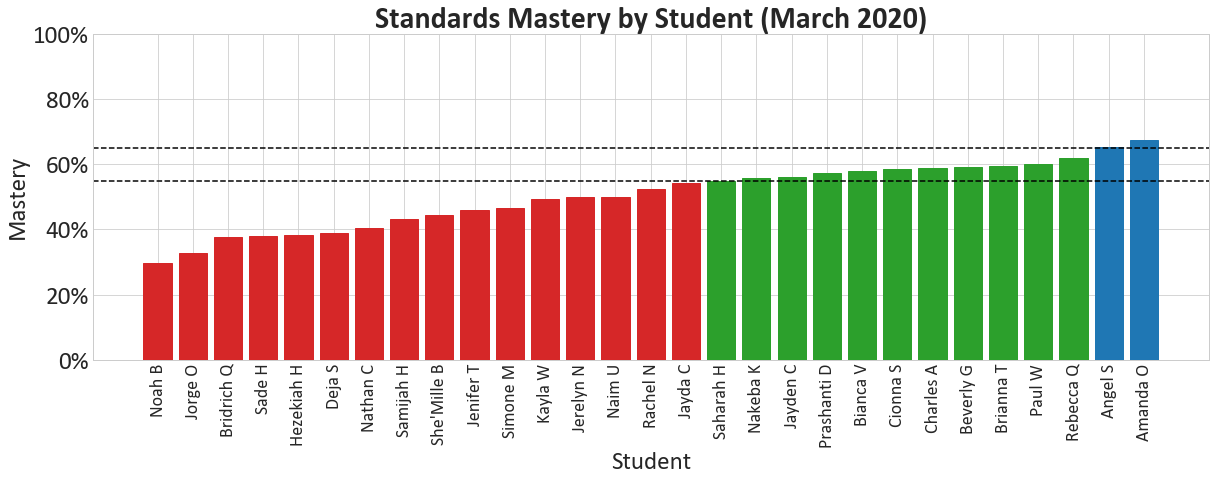

In [5]:
plt.rcParams.update({'font.size': 25})

## Visualization of Mastery by Student
mastery_df = academic_df.groupby('name').agg({'mastery':np.mean})
mastery_df = mastery_df.drop('Wilschnaida M')
mastery_df = mastery_df.sort_values(by=['mastery'])
mastery_df['perf_band_no'] = mastery_df['mastery'].apply(lambda x: 3 if (x >= 0.65) else (2 if x >=0.55 else 1))
mastery_df['perf_band'] = mastery_df['mastery'].apply(lambda x: 'Above Ambitious' if (x >= 0.65) else ('Between Proficient and Ambitious' if x >=0.55 else 'Below Proficient'))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

students = mastery_df.index
x0 = np.arange(len(students))
width = 0.8

fig, ax = plt.subplots(figsize = (20,6))
barlist = ax.bar(x0, mastery_df.mastery, width)
ax.set_ylim([0,1])
axes_to_percent(ax)
ax.set(title='Standards Mastery by Student (March 2020)', xlabel = 'Student', ylabel = 'Mastery')
ax.axhline(y=0.55, color = 'black', linestyle ='--')
ax.axhline(y=0.65, color = 'black', linestyle ='--')
ax.set_xticks(x0)
ax.set_xticklabels(students, size = 18, rotation = 90)

# Color each bar based on mastery
for n in range(len(barlist)):
    if mastery_df['mastery'][n] >= 0.65:
        barlist[n].set_color(colors[0])
    elif mastery_df['mastery'][n] >= 0.55:
        barlist[n].set_color(colors[2])
    else:
        barlist[n].set_color(colors[3])

plt.show()

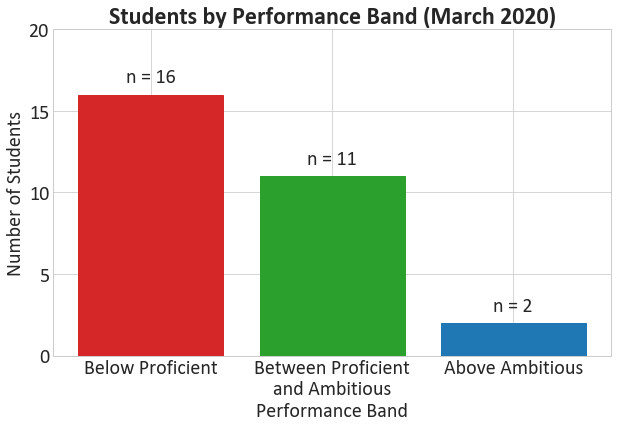

['n = 16', 'n = 11', 'n = 2']


In [6]:
plt.rcParams.update({'font.size': 20})

## Visualization of counts in each performance band
mastery_df['perf_band_no'] = mastery_df['mastery'].apply(lambda x: 3 if (x >= 0.65) else (2 if x >=0.55 else 1))
mastery_df['perf_band'] = mastery_df['mastery'].apply(lambda x: 'Above Ambitious' if (x >= 0.65) else ('Between Proficient and Ambitious' if x >=0.55 else 'Below Proficient'))
perf_band_df = mastery_df.groupby(['perf_band_no','perf_band']).agg({'mastery':len})
perf_band_df.columns = ['count']
perf_band_df['count'] = perf_band_df['count'].apply(lambda x: int(x))
perf_band_df

bands = perf_band_df.index
x = np.arange(3)
width = 0.8

band_names = ['Below Proficient','Between Proficient and Ambitious','Above Ambitious']
band_names = [ '\n'.join(wrap(i,20)) for i in band_names]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax = plt.subplots(figsize = (10,6))
barlist = plt.bar(x, perf_band_df['count'], width)
barlist[0].set_color(colors[3])
barlist[1].set_color(colors[2])
barlist[2].set_color(colors[0])
ax.set(title='Students by Performance Band (March 2020)', xlabel = 'Performance Band', ylabel = 'Number of Students')
ax.set_xticks(x)
ax.set_yticks([0,5,10,15,20])
ax.set_xticklabels(band_names, wrap = True)

#indicators = perf_band_df.index
#indicators = [ '\n'.join(wrap(i,20)) for i in indicators]
x0 = np.arange(3)
width = 0.8

# Label each of the bars with the number of values
labels = ['n = {}'.format(n) for n in perf_band_df['count']]

for bar, label in zip(barlist, labels):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, label, ha = 'center', va = 'bottom')

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.show()
print(labels)

## Data Analysis for Character Results

In [7]:
# Create a separate data from for each character trait
curiosity_df = character_df[character_df.character_trait == 'Curiosity']
grit_df = character_df[character_df.character_trait == 'Grit']
gratitude_df = character_df[character_df.character_trait == 'Gratitude']

In [8]:
# Average by indicator by date by student
character_df.groupby(['name','date','character_trait','indicator']).agg({'score':[np.mean]})

# Average by indicator by date
character_df.groupby(['date','indicator']).agg({'score':[np.mean]})

# Average by character trait by date
character_df.groupby(['date','character_trait']).agg({'score':[np.mean]})

# Student averages for each trait for final date
character_df[character_df.date == '2020-03-15'].groupby(['name','character_trait']).agg({'score':[np.mean]})

score
                                 mean
name        character_trait          
Amanda O    Curiosity        3.111111
            Gratitude        3.333333
            Grit             3.222222
Angel S     Curiosity        4.333333
            Gratitude        3.500000
...                               ...
She'Mille B Gratitude        3.833333
            Grit             3.555556
Simone M    Curiosity        4.222222
            Gratitude        4.000000
            Grit             2.888889

[87 rows x 1 columns]

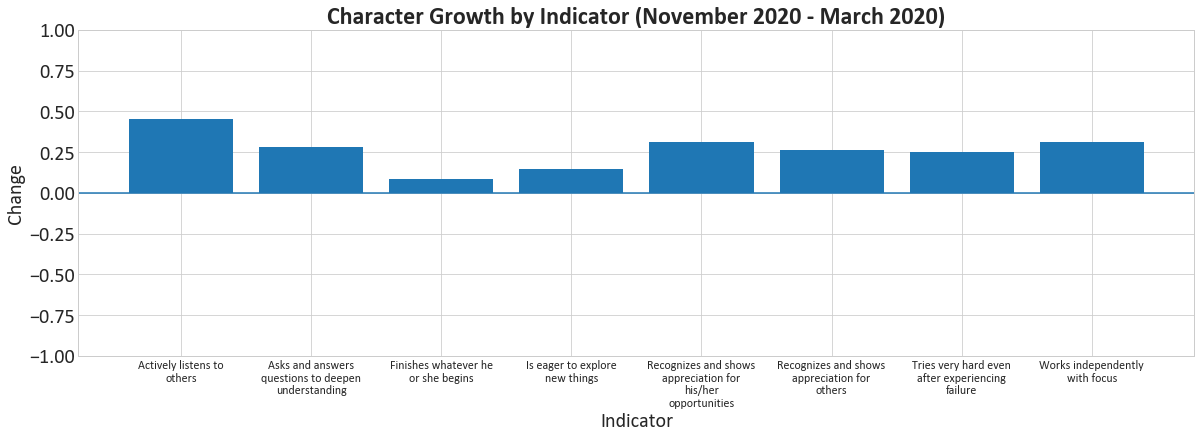

In [9]:
plt.rcParams.update({'font.size': 20})
# Visualization of the growth from the beginning of the year to the end

df_initial = character_df[character_df.date == '2019-11-15'].groupby(['indicator']).agg({'score':np.mean})
df_initial = df_initial.rename(columns={'score':'initial_score'})
df_final = character_df[character_df.date == '2020-03-15'].groupby(['indicator']).agg({'score':np.mean})
df_final = df_final.rename(columns={'score':'final_score'})
df_growth = pd.merge(df_initial, df_final, on='indicator')
df_growth['delta'] = df_growth.final_score - df_growth.initial_score

indicators = df_growth.index
indicators = [ '\n'.join(wrap(i,20)) for i in indicators]
x0 = np.arange(8)
width = 0.8

fig, ax = plt.subplots(figsize = (20,6))
ax.bar(x0, df_growth.delta, width)
ax.set_ylim([-1,1])
ax.set(title='Character Growth by Indicator (November 2020 - March 2020)', xlabel = 'Indicator', ylabel = 'Change')
ax.set_xticks(x0)
ax.set_xticklabels(indicators, wrap = True, size = 12)
ax.axhline(y = 0)

plt.show()

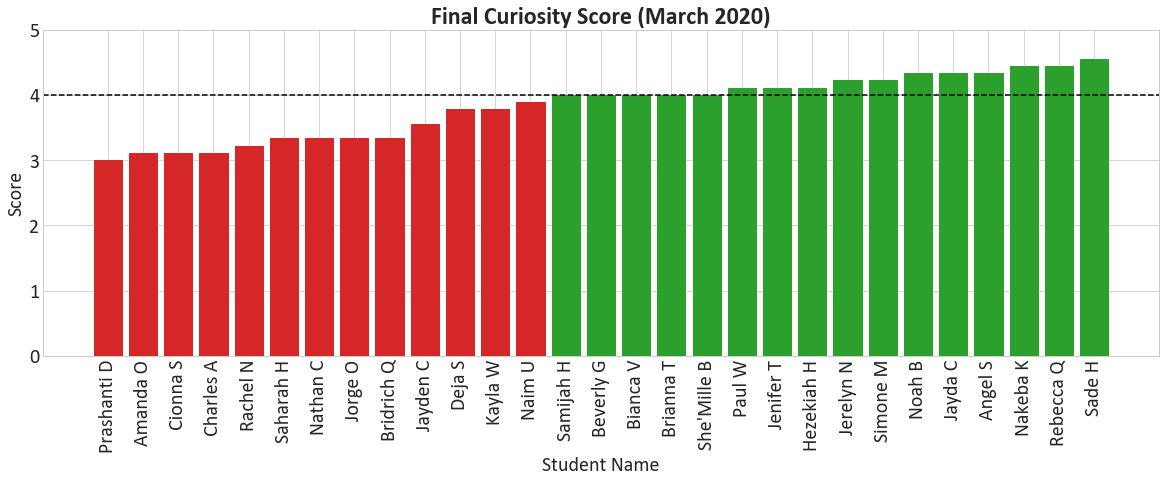

In [10]:
plt.rcParams.update({'font.size': 20})

## Visualization of all student scores by name
df_temp = curiosity_df[curiosity_df.date == '2020-03-15'].groupby('name').agg({'score':np.mean}).sort_values('score')
df_temp.head()

names = df_temp.index
x = np.arange(names.size)

fig, ax = plt.subplots(figsize = (20,6))
barlist = ax.bar(names, df_temp.score,)
ax.set_ylim([0,5])
ax.set_xticks(x)
ax.set_xticklabels(names, rotation = 90)
ax.set(title='Final Curiosity Score (March 2020)', xlabel = 'Student Name', ylabel = 'Score')
ax.axhline(y=4, color = 'black', linestyle ='--')

# Color each bar based on character score
for n in range(len(barlist)):
    if df_temp['score'][n] >= 4:
        barlist[n].set_color(colors[2])
    else:
        barlist[n].set_color(colors[3])

plt.show()

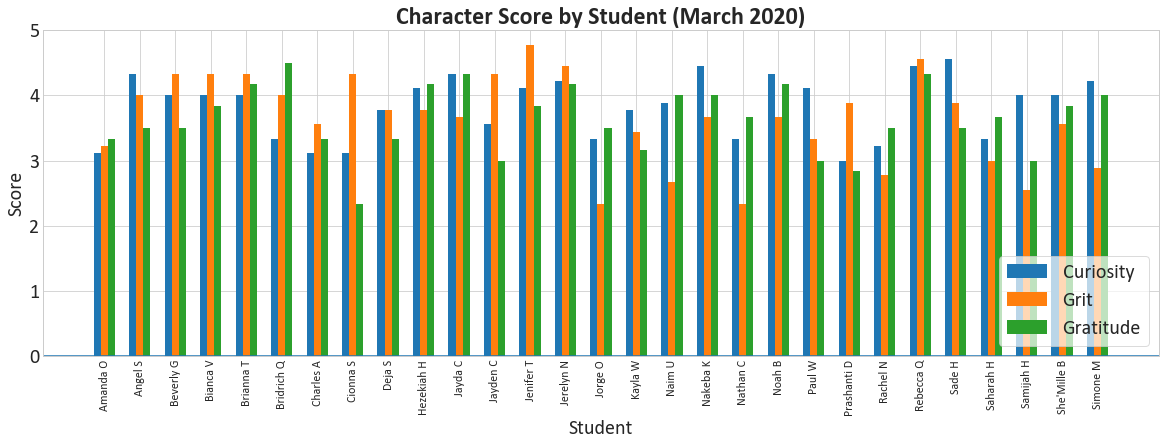

In [11]:
plt.rcParams.update({'font.size': 20})

## Visualization of Final Character Trait Score by Student
df1 = curiosity_df[curiosity_df.date == '2020-03-15'].groupby('name').agg({'score':np.mean})
df2 = grit_df[grit_df.date == '2020-03-15'].groupby('name').agg({'score':np.mean})
df3 = gratitude_df[gratitude_df.date == '2020-03-15'].groupby('name').agg({'score':np.mean}) 

students = df1.index
x0 = np.arange(len(students))
width = 0.2

fig, ax = plt.subplots(figsize = (20,6))
ax.bar(x0-width, df1.score, width)
ax.bar(x0, df2.score, width)
ax.bar(x0+width, df3.score, width)
ax.set_ylim([0,5])
ax.set(title='Character Score by Student (March 2020)', xlabel = 'Student', ylabel = 'Score')
ax.set_xticks(x0)
ax.set_xticklabels(students, size = 12, rotation = 90)
ax.legend(['Curiosity','Grit','Gratitude'], loc = 4, frameon = 1, facecolor = 'white', framealpha = 0.7)

ax.axhline(y = 0)
plt.show()


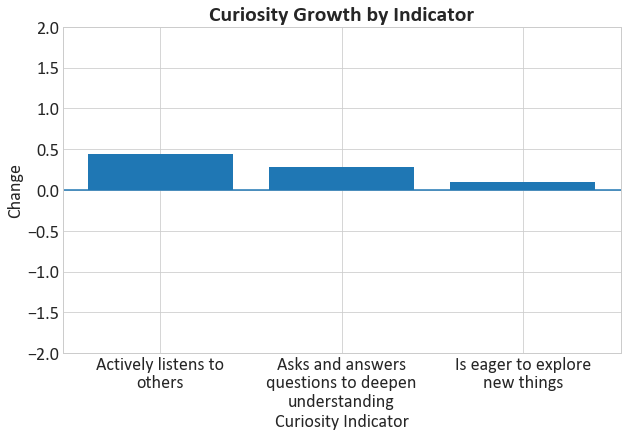

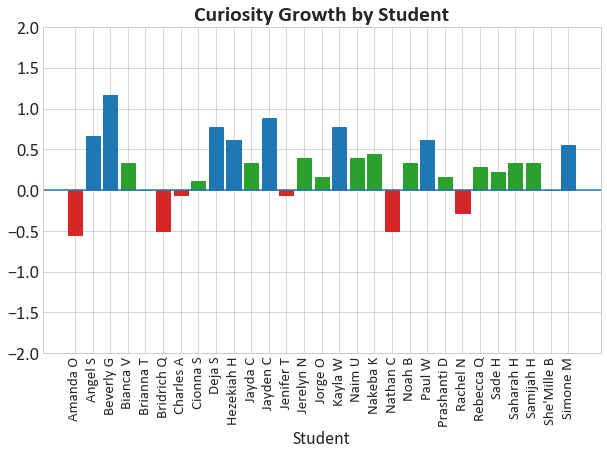

In [12]:
plt.rcParams.update({'font.size': 18})
# Visualization of the growth from the beginning of the year to the end

df_initial = curiosity_df[curiosity_df.date == '2019-11-15'].groupby(['name','indicator']).agg({'score':np.mean})
df_initial = df_initial.rename(columns={'score':'initial_score'})
df_final = curiosity_df[curiosity_df.date == '2020-03-15'].groupby(['name','indicator']).agg({'score':np.mean})
df_final = df_final.rename(columns={'score':'final_score'})
df_growth = pd.merge(df_initial, df_final, on=['name','indicator'])
df_growth['delta'] = df_growth.final_score - df_growth.initial_score
df_growth2 = df_growth.groupby('indicator').agg({'delta':np.mean})

df_growth3 = df_growth.groupby('name').agg({'delta':np.mean})

indicators = df_growth2.index
indicators = [ '\n'.join(wrap(i,20)) for i in indicators]
x0 = np.arange(3)
width = 0.8

fig, ax0 = plt.subplots(nrows = 1, ncols=1, sharey=True, figsize = (10,6))
ax0.bar(x0, df_growth2.delta, width)
ax0.set_ylim([-2,2])
ax0.set(title='Curiosity Growth by Indicator', xlabel = 'Curiosity Indicator', ylabel = 'Change')
ax0.set_xticks(x0)
ax0.set_xticklabels(indicators, wrap = True)
ax0.axhline(y = 0)
plt.show()

fig, ax1 = plt.subplots(nrows = 1, ncols=1, sharey=True, figsize = (10,6))
barlist = ax1.bar(df_growth3.index, df_growth3.delta, width)
ax1.set(title='Curiosity Growth by Student', xlabel = 'Student')
ax1.set_xticklabels(df_growth3.index, rotation = 90, size =15)
ax1.set_ylim([-2,2])
ax1.axhline(y = 0)

# Color each bar based on character score
for n in range(len(barlist)):
    if df_growth3['delta'][n] >= 0.5:
        barlist[n].set_color(colors[0])
    elif df_growth3['delta'][n] >= 0:
        barlist[n].set_color(colors[2])
    else:
        barlist[n].set_color(colors[3])

plt.show()



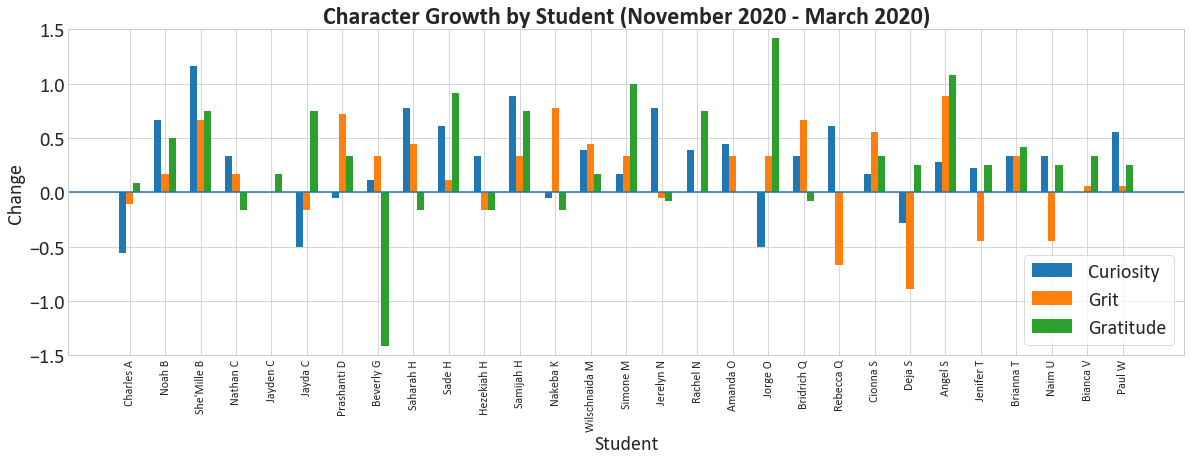

In [13]:
plt.rcParams.update({'font.size': 20})
# Visualization of the growth from the beginning of the year to the end
df_list = [curiosity_df, grit_df, gratitude_df]

students = curiosity_df.name.unique()
x0 = np.arange(29)
width = 0.2

fig, ax = plt.subplots(figsize = (20,6))
step = 0

for df in df_list:
    df_initial = df[df.date == '2019-11-15'].groupby(['name']).agg({'score':np.mean})
    df_initial = df_initial.rename(columns={'score':'initial_score'})
    df_final = df[df.date == '2020-03-15'].groupby(['name']).agg({'score':np.mean})
    df_final = df_final.rename(columns={'score':'final_score'})
    df_growth = pd.merge(df_initial, df_final, on='name')
    df_growth['delta'] = df_growth.final_score - df_growth.initial_score
    shift = -width + step*width
    ax.bar(x0 + shift, df_growth.delta, width)
    step+=1
    
ax.set_ylim([-1.5,1.5])
ax.set(title='Character Growth by Student (November 2020 - March 2020)', xlabel = 'Student', ylabel = 'Change')
ax.set_xticks(x0)
ax.set_xticklabels(students, size = 12, rotation = 90)
ax.legend(['Curiosity','Grit','Gratitude'], loc = 4, frameon=1, facecolor='white', framealpha = 0.7)

ax.axhline(y = 0)
plt.show()

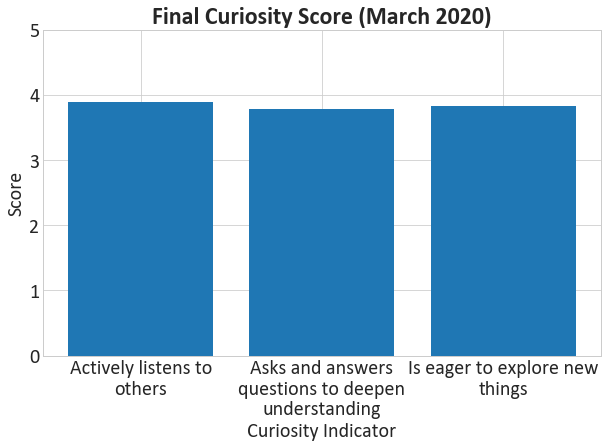

In [14]:
plt.rcParams.update({'font.size': 20})

## Visualization of average final score by indicator
df_temp = curiosity_df[curiosity_df.date == '2020-03-15'].groupby(['indicator']).agg({'score':np.mean})

indicators = df_temp.index
indicators = [ '\n'.join(wrap(i,25)) for i in indicators]
x = np.arange(3)
width = 0.8
## Visualization of average final score by indicator
fig, ax = plt.subplots(figsize = (10,6))
plt.bar(x, df_temp.score, width)
ax.set_ylim([0,5])
ax.set(title='Final Curiosity Score (March 2020)', xlabel = 'Curiosity Indicator', ylabel = 'Score')
ax.set_xticks(x)
ax.set_xticklabels(indicators, wrap = True)
plt.show()

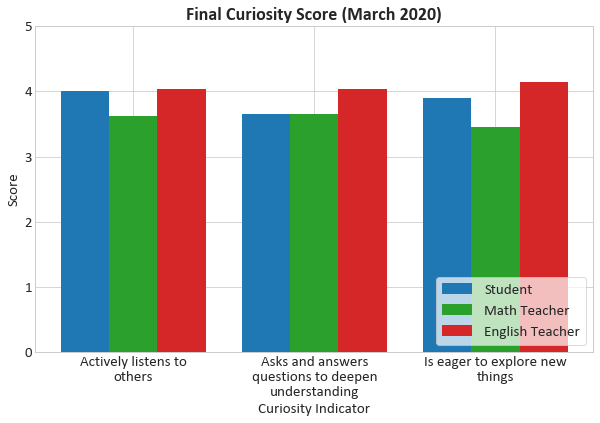

In [15]:
plt.rcParams.update({'font.size': 15})
## Visualization of average of final score by evaluation and indicator

df_temp1 = curiosity_df[(curiosity_df.date == '2020-03-15') & (curiosity_df.evaluator == 'Student')].groupby(['indicator']).agg({'score':np.mean})
df_temp2 = curiosity_df[(curiosity_df.date == '2020-03-15') & (curiosity_df.evaluator == 'Math Teacher')].groupby(['indicator']).agg({'score':np.mean})
df_temp3 = curiosity_df[(curiosity_df.date == '2020-03-15') & (curiosity_df.evaluator == 'English Teacher')].groupby(['indicator']).agg({'score':np.mean})

indicators = df_temp1.index
indicators = [ '\n'.join(wrap(i,25)) for i in indicators]
x = np.arange(3)
width = 0.8/3

fig, ax = plt.subplots(figsize = (10,6))
student_bar = ax.bar(x-width, df_temp1.score, width, label='Student')
math_bar = ax.bar(x, df_temp2.score, width, label='Math Teacher', color = colors[2])
english_bar = ax.bar(x+width, df_temp3.score, width, label='English Teacher', color = colors[3])
ax.set_ylim([0,5])
ax.set_xticks(x)
ax.set_xticklabels(indicators, wrap = True)
ax.set(title='Final Curiosity Score (March 2020)', xlabel = 'Curiosity Indicator', ylabel = 'Score')
ax.legend(loc = 4, frameon=1, facecolor = 'white', framealpha = 0.7)
plt.show()

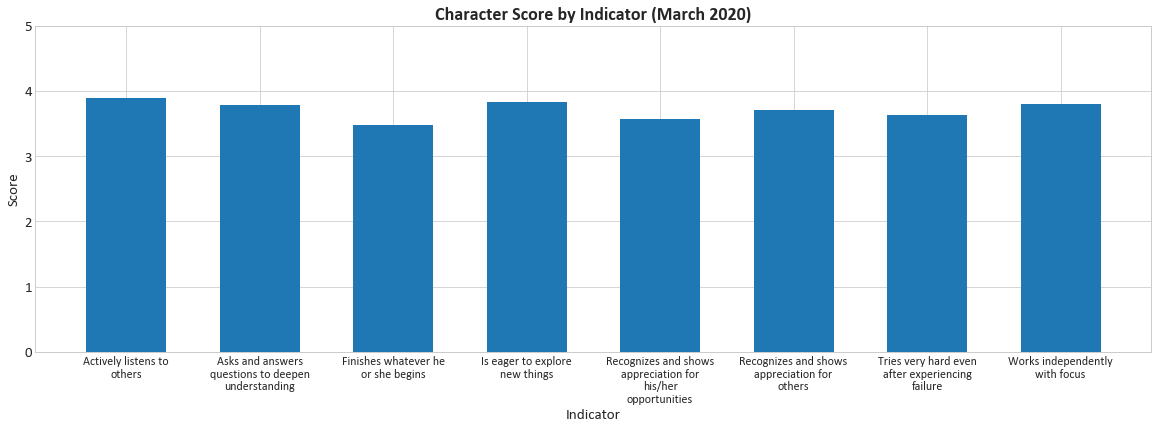

In [16]:
### Plot the final score by indicator
df_temp = character_df[character_df.date == '2020-03-15'].groupby(['indicator']).agg({'score':np.mean})

indicators = df_temp.index
indicators = [ '\n'.join(wrap(i,20)) for i in indicators]
x = np.arange(8)
width = 0.6
## Visualization of average final score by indicator
fig, ax = plt.subplots(figsize = (20,6))
plt.bar(x, df_temp.score, width)
ax.set_ylim([0,5])
ax.set(title='Character Score by Indicator (March 2020)', xlabel = 'Indicator', ylabel = 'Score')
ax.set_xticks(x)
ax.set_xticklabels(indicators, wrap = True, size = 12)
plt.show()


## Data Analysis for Subgroups of Students

In [17]:
mastery_df

,mastery,perf_band_no,perf_band
name,,,
Noah B,0.297162,1,Below Proficient
Jorge O,0.327265,1,Below Proficient
Bridrich Q,0.378113,1,Below Proficient
Sade H,0.379716,1,Below Proficient
Hezekiah H,0.381562,1,Below Proficient
Deja S,0.389215,1,Below Proficient
Nathan C,0.404708,1,Below Proficient
Samijah H,0.431445,1,Below Proficient
She'Mille B,0.442885,1,Below Proficient


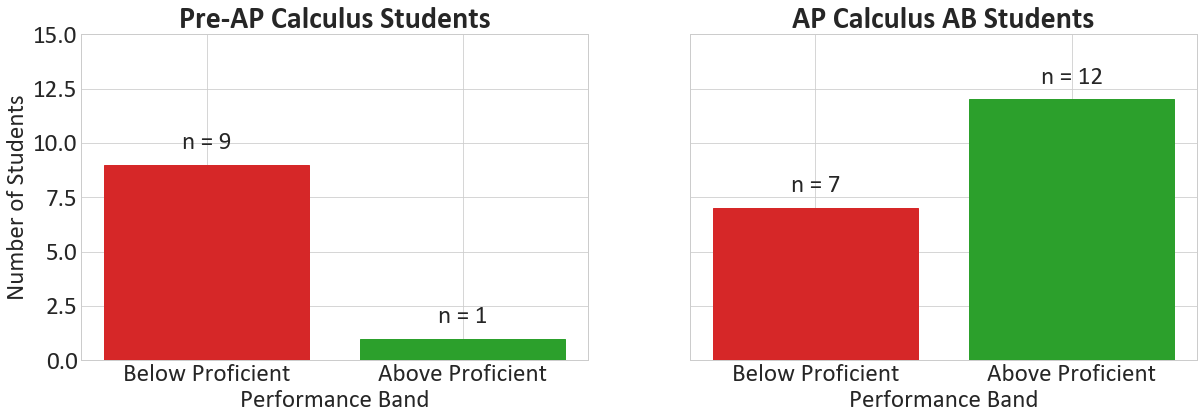

p-value: 0.00013876632911254605


In [98]:
# Join the overall mastery with the student info
mastery_students_df = mastery_df.merge(students_df, on='name', how='left')
mastery_students_df['perf_band'] = mastery_students_df['perf_band'].apply(lambda x: x if x == 'Below Proficient' else 'Above Proficient')
mastery_students_df['perf_band_no'] = mastery_students_df['perf_band_no'].apply(lambda x: 1 if x == 1 else 2)

# Create dataframe for students from Pre-AP Calculus
preapcalc_df = mastery_students_df[mastery_students_df.previous_course == 'Pre-AP Calculus']
preapcalc_df = preapcalc_df.reset_index().drop(columns = ['index'])
preapcalc_df

# Create dataframe for students from AP Calculus AB
apcalcab_df = mastery_students_df[mastery_students_df.previous_course == 'AP Calculus AB']
apcalcab_df = apcalcab_df.reset_index().drop(columns = ['index'])
apcalcab_df

# Aggregate by count above or below proficient for each dataframe
preapcalc_count_df = preapcalc_df.groupby(['perf_band_no','perf_band']).agg({'race':len})
apcalcab_count_df = apcalcab_df.groupby(['perf_band_no','perf_band']).agg({'race':len})

# Plot the count for each subgroup (use two subplots)

performance_bands = []
for n in range(len(preapcalc_count_df)):
    performance_bands.append(preapcalc_count_df.index[n][1])
performance_bands = [ '\n'.join(wrap(i,20)) for i in performance_bands]
x0 = np.arange(len(performance_bands))
width = 0.8

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize = (20,6))

barlist0 = ax0.bar(x0, preapcalc_count_df.race, width)
ax0.set(title='Pre-AP Calculus Students', xlabel = 'Performance Band', ylabel = 'Number of Students')
ax0.set_xticks(x0)
ax0.set_xticklabels(performance_bands, wrap = True)
ax0.set_ylim([0,15])

labels = ['n = {}'.format(n) for n in preapcalc_count_df['race']]

for bar, label in zip(barlist0, labels):
    height = bar.get_height()
    ax0.text(bar.get_x() + bar.get_width() / 2, height + 0.5, label, ha = 'center', va = 'bottom')

barlist0[0].set_color(colors[3])
barlist0[1].set_color(colors[2])
    
barlist1 = ax1.bar(x0, apcalcab_count_df.race, width)
ax1.set(title='AP Calculus AB Students', xlabel = 'Performance Band')
ax1.set_xticks(x0)
ax1.set_xticklabels(performance_bands, wrap = True)

labels = ['n = {}'.format(n) for n in apcalcab_count_df['race']]

for bar, label in zip(barlist1, labels):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.5, label, ha = 'center', va = 'bottom')

barlist1[0].set_color(colors[3])
barlist1[1].set_color(colors[2])
    
plt.show()

t_val, p_val = stats.ttest_ind(apcalcab_df.mastery, preapcalc_df.mastery)
print('p-value: {}'.format(p_val))

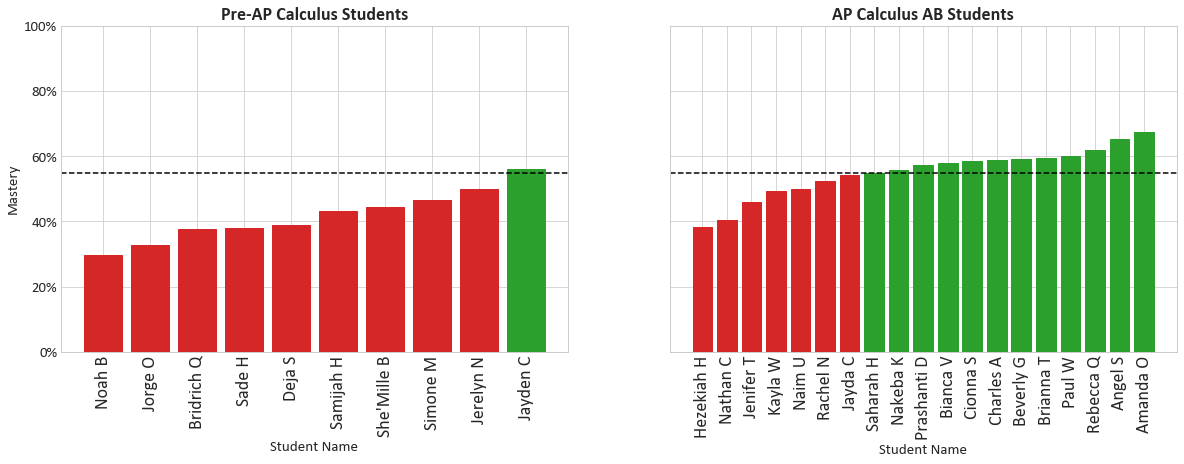

In [19]:
# Create visualizaton of mastery by student broken down by subgroups
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize = (20,6))

barlist1 = ax0.bar(preapcalc_df.name, preapcalc_df.mastery, width)
ax0.set(title='Pre-AP Calculus Students', xlabel = 'Student Name', ylabel = 'Mastery')
ax0.set_xticklabels(preapcalc_df.name, rotation = 90, size = 18)
ax0.set_ylim([0,1])
ax0.axhline(y = 0.55, color = 'black', linestyle = '--')
axes_to_percent(ax0)

# Color each bar based on character score
for n in range(len(barlist1)):
    if preapcalc_df['mastery'][n] >= 0.55:
        barlist1[n].set_color(colors[2])
    else:
        barlist1[n].set_color(colors[3])

barlist2 = ax1.bar(apcalcab_df.name, apcalcab_df.mastery, width)
ax1.set(title='AP Calculus AB Students', xlabel = 'Student Name')
ax1.set_xticklabels(apcalcab_df.name, rotation = 90, size = 18)
ax1.axhline(y = 0.55, color = 'black', linestyle = '--')

# Color each bar based on character score
for n in range(len(barlist2)):
    if apcalcab_df['mastery'][n] >= 0.55:
        barlist2[n].set_color(colors[2])
    else:
        barlist2[n].set_color(colors[3])

plt.show()



In [20]:
character_df

,name,date,character_trait,indicator,evaluator,score
0,Charles A,2019-11-15,Curiosity,Is eager to explore new things,Student,4
1,Noah B,2019-11-15,Curiosity,Is eager to explore new things,Student,4
2,She'Mille B,2019-11-15,Curiosity,Is eager to explore new things,Student,5
3,Nathan C,2019-11-15,Curiosity,Is eager to explore new things,Student,4
4,Jayden C,2019-11-15,Curiosity,Is eager to explore new things,Student,3
...,...,...,...,...,...,...
1915,Brianna T,2020-03-15,Gratitude,Recognizes and shows appreciation for his/her ...,English Teacher,4
1916,Naim U,2020-03-15,Gratitude,Recognizes and shows appreciation for his/her ...,English Teacher,3
1917,Bianca V,2020-03-15,Gratitude,Recognizes and shows appreciation for his/her ...,English Teacher,5
1918,Paul W,2020-03-15,Gratitude,Recognizes and shows appreciation for his/her ...,English Teacher,3


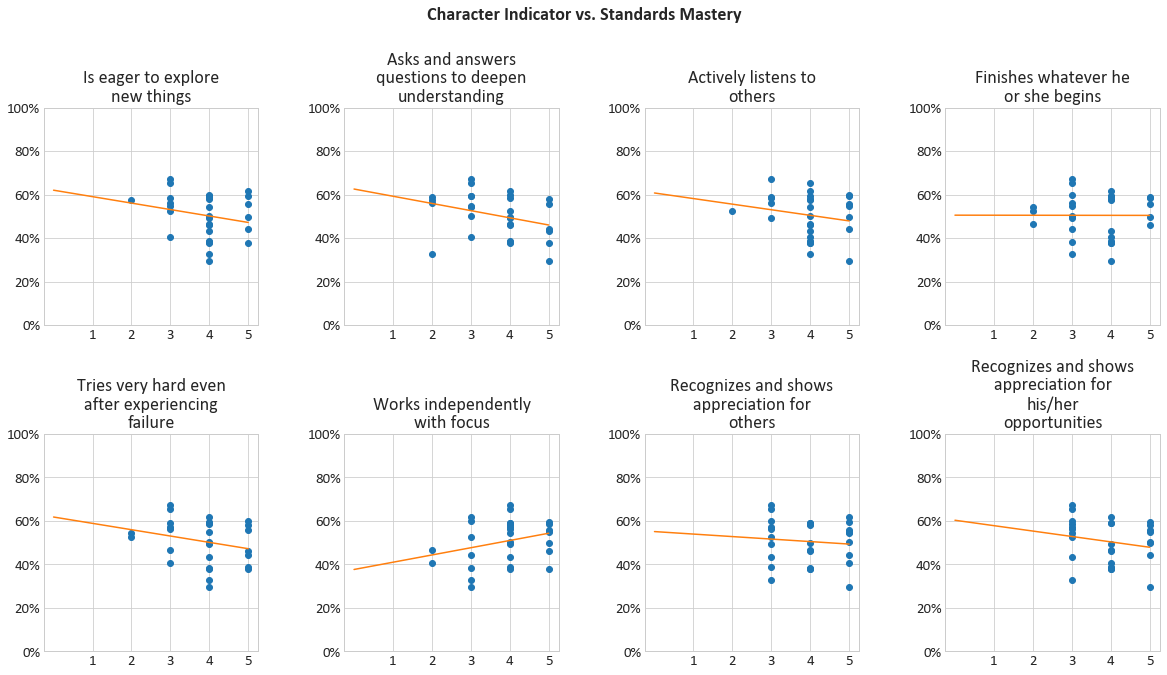

,slope,intercept,r^2
Is eager to explore new things,-0.029655,0.620587,0.052376
Asks and answers questions to deepen understanding,-0.033073,0.625920,0.103636
Actively listens to others,-0.025687,0.607781,0.037672
Finishes whatever he or she begins,-0.000193,0.505732,0.000003
Tries very hard even after experiencing failure,-0.029129,0.617531,0.064941
Works independently with focus,0.033331,0.376308,0.085028
Recognizes and shows appreciation for others,-0.011491,0.550602,0.008937
Recognizes and shows appreciation for his/her opportunities,-0.024846,0.602702,0.039347


In [21]:
## Visualize final curiosity score vs. mastery in a xy axis
indicators = character_df.indicator.unique()
indicators2 = [ '\n'.join(wrap(i,20)) for i in indicators]
x = np.arange(8)
width = 0.6

## Set up figure for plotting (2 rows, 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize = (20,10))
regression_info = pd.DataFrame(columns = ['slope','intercept','r^2'])

for n, indicator in enumerate(indicators):
    
    # Create Data Frame for each indicator
    temp_df = character_df[(character_df.date == '2020-03-15') & (character_df.evaluator == 'Student') & (character_df.indicator == indicator)].groupby(['name','indicator']).agg({'score':np.mean})
    temp_df = temp_df.merge(mastery_df, on='name', how='left')
    
    # Plot x-y scatter in the respective graph
    ax = plt.subplot(2,4,n+1)
    ax.scatter(temp_df.score, temp_df.mastery)
    ax.set_title(indicators2[n], fontdict={'fontsize':18,'fontweight': 'normal'})
    #print("Plotted {} for plot {}".format(indicator,n))
        
    # Perform linear regression on each indicator
    model = LinearRegression()
    X = temp_df.score.values.reshape(-1,1)
    y = temp_df.mastery.values.reshape(-1,1)
    model.fit(X,y)
    #print("R^2: {}, m: {}".format(model.score(X,y),model.coef_))
    
    # Plot the lienar regression line on the axes
    x_val = np.linspace(0,5,100)
    y_val = model.predict(x_val.reshape(-1,1))
    ax.plot(x_val, y_val, c=colors[1])
    ax.set_xticks([1,2,3,4,5])
    axes_to_percent(ax)
    
    # Update data frame with values
    slope = float(model.coef_)
    intercept = float(model.intercept_)
    r_squared = float(model.score(X,y))
    new_row = {'slope':slope,'intercept':intercept, 'r^2':r_squared}
    regression_info = regression_info.append(new_row, ignore_index=True)

# Add title to entire figure
fig.suptitle('Character Indicator vs. Standards Mastery', fontweight = 'bold', y = 1.02)

# Show the plot
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.4)
plt.show()

regression_info.index=indicators
regression_info

# Curiosity vs. Mastery

In [59]:
# Let's look at the performance by students who were and were not proficient

curiosity_df
curiosity_mastery_df = curiosity_df[(curiosity_df['date'] == '2020-03-15')].groupby(['name']).agg({'score':np.mean}).copy()
curiosity_mastery_df = curiosity_mastery_df.merge(mastery_df, on = 'name', how = 'left')
curiosity_mastery_df

cm1_df = curiosity_mastery_df[curiosity_mastery_df['score'] < 4].copy()
cm2_df = curiosity_mastery_df[curiosity_mastery_df['score'] >= 4].copy()

cm1_count_df = cm1_df.copy()
cm1_count_df['perf_band'] = cm1_count_df['mastery'].apply(lambda x: 'Above proficient' if x >=0.55 else 'Below proficient')
cm1_count_df['perf_band_no'] = cm1_count_df['mastery'].apply(lambda x: 2 if x >=0.55 else 1)
cm1_count_df = cm1_count_df.groupby(['perf_band_no','perf_band']).agg({'mastery':len})

cm2_count_df = cm2_df.copy()
cm2_count_df['perf_band'] = cm2_count_df['mastery'].apply(lambda x: 'Above proficient' if x >=0.55 else 'Below proficient')
cm2_count_df['perf_band_no'] = cm2_count_df['mastery'].apply(lambda x: 2 if x >=0.55 else 1)
cm2_count_df = cm2_count_df.groupby(['perf_band_no','perf_band']).agg({'mastery':len})


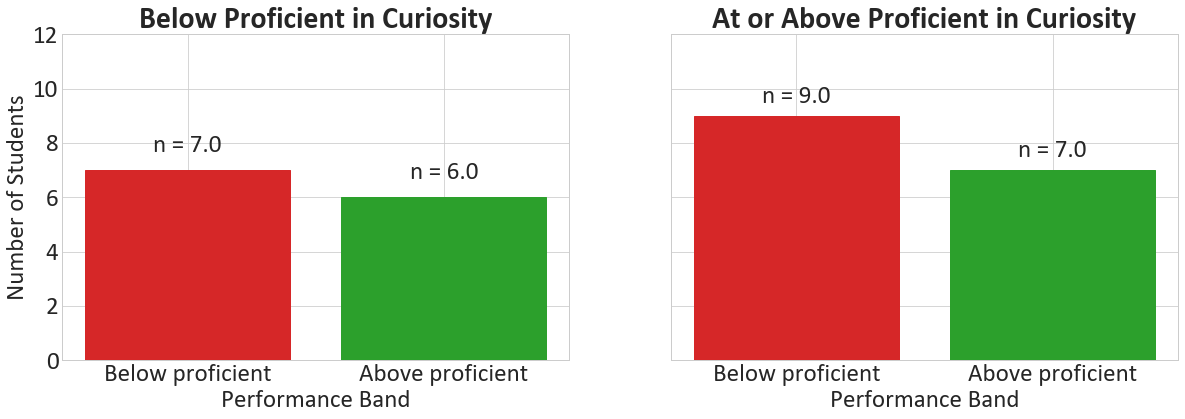

p-value: 0.960644605048918


In [129]:
plt.rcParams.update({'font.size': 25})

performance_bands = ['Below proficient', 'Above proficient']
x0 = np.arange(len(performance_bands))
width = 0.8

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize = (20,6))

barlist0 = ax0.bar(x0, cm1_count_df['mastery'], width)
ax0.set(title='Below Proficient in Curiosity', xlabel = 'Performance Band', ylabel = 'Number of Students')
ax0.set_xticks(x0)
ax0.set_xticklabels(performance_bands, wrap = True)
ax0.set_ylim([0,12])

labels = ['n = {}'.format(n) for n in cm1_count_df['mastery']]

for bar, label in zip(barlist0, labels):
    height = bar.get_height()
    ax0.text(bar.get_x() + bar.get_width() / 2, height + 0.5, label, ha = 'center', va = 'bottom')

barlist0[0].set_color(colors[3])
barlist0[1].set_color(colors[2])
    
barlist1 = ax1.bar(x0, cm2_count_df['mastery'], width)
ax1.set(title='At or Above Proficient in Curiosity', xlabel = 'Performance Band')
ax1.set_xticks(x0)
ax1.set_xticklabels(performance_bands, wrap = True)

labels = ['n = {}'.format(n) for n in cm2_count_df['mastery']]

for bar, label in zip(barlist1, labels):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.3, label, ha = 'center', va = 'bottom')

barlist1[0].set_color(colors[3])
barlist1[1].set_color(colors[2])
    
plt.show()

t_val, p_val = stats.ttest_ind(cm1_df['mastery'],cm2_df['mastery'], equal_var = False)
print('p-value: {}'.format(p_val))

In [73]:
## Significance test for difference in these two samples:



Ttest_indResult(statistic=4.43534502838043, pvalue=0.00013876632911254605)

# Grit vs. Mastery

In [108]:
# Let's look at the performance by students who were and were not proficient

grit_df
grit_mastery_df = grit_df[(grit_df['date'] == '2020-03-15')].groupby(['name']).agg({'score':np.mean}).copy()
grit_mastery_df = grit_mastery_df.merge(mastery_df, on = 'name', how = 'left')
grit_mastery_df

gm1_df = grit_mastery_df[grit_mastery_df['score'] < 4].copy()
gm2_df = grit_mastery_df[grit_mastery_df['score'] >= 4].copy()

gm1_count_df = gm1_df.copy()
gm1_count_df['perf_band'] = gm1_count_df['mastery'].apply(lambda x: 'Above proficient' if x >=0.55 else 'Below proficient')
gm1_count_df['perf_band_no'] = gm1_count_df['mastery'].apply(lambda x: 2 if x >=0.55 else 1)
gm1_count_df = gm1_count_df.groupby(['perf_band_no','perf_band']).agg({'mastery':len})

gm2_count_df = gm2_df.copy()
gm2_count_df['perf_band'] = gm2_count_df['mastery'].apply(lambda x: 'Above proficient' if x >=0.55 else 'Below proficient')
gm2_count_df['perf_band_no'] = gm2_count_df['mastery'].apply(lambda x: 2 if x >=0.55 else 1)
gm2_count_df = gm2_count_df.groupby(['perf_band_no','perf_band']).agg({'mastery':len})

gm1_count_df


,,mastery
perf_band_no,perf_band,
1,Below proficient,13.0
2,Above proficient,6.0


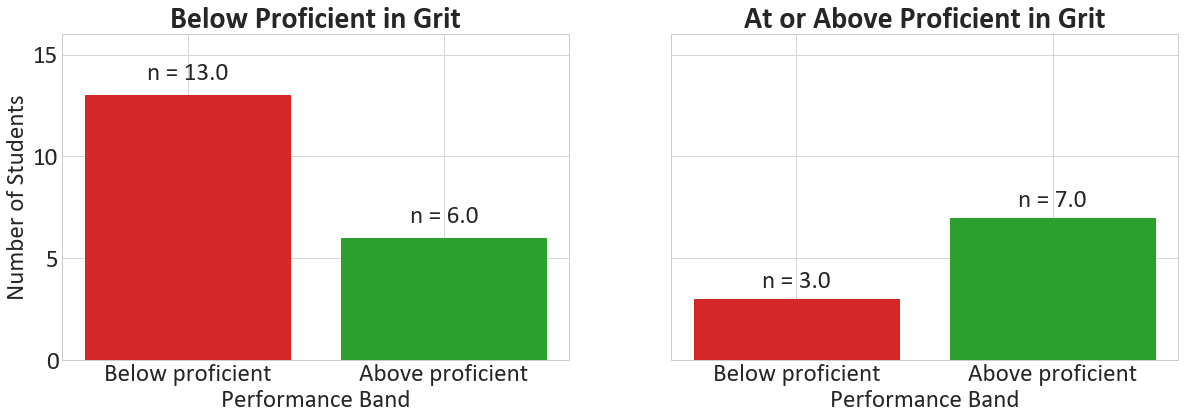

p-value: 0.05177096875199935


In [112]:
plt.rcParams.update({'font.size': 25})

performance_bands = ['Below proficient', 'Above proficient']
x0 = np.arange(len(performance_bands))
width = 0.8

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize = (20,6))

barlist0 = ax0.bar(x0, gm1_count_df['mastery'], width)
ax0.set(title='Below Proficient in Grit', xlabel = 'Performance Band', ylabel = 'Number of Students')
ax0.set_xticks(x0)
ax0.set_xticklabels(performance_bands, wrap = True)
ax0.set_ylim([0,16])

labels = ['n = {}'.format(n) for n in gm1_count_df['mastery']]

for bar, label in zip(barlist0, labels):
    height = bar.get_height()
    ax0.text(bar.get_x() + bar.get_width() / 2, height + 0.5, label, ha = 'center', va = 'bottom')

barlist0[0].set_color(colors[3])
barlist0[1].set_color(colors[2])
    
barlist1 = ax1.bar(x0, gm2_count_df['mastery'], width)
ax1.set(title='At or Above Proficient in Grit', xlabel = 'Performance Band')
ax1.set_xticks(x0)
ax1.set_xticklabels(performance_bands, wrap = True)

labels = ['n = {}'.format(n) for n in gm2_count_df['mastery']]

for bar, label in zip(barlist1, labels):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.3, label, ha = 'center', va = 'bottom')

barlist1[0].set_color(colors[3])
barlist1[1].set_color(colors[2])
    
plt.show()

t_val, p_val = stats.ttest_ind(gm1_df['mastery'],gm2_df['mastery'], equal_var = False)

print('p-value: {}'.format(p_val))

# Gratitude vs. Mastery

In [126]:
# Let's look at the performance by students who were and were not proficient

gratitude_df
gratitude_mastery_df = gratitude_df[(gratitude_df['date'] == '2020-03-15')].groupby(['name']).agg({'score':np.mean}).copy()
gratitude_mastery_df = gratitude_mastery_df.merge(mastery_df, on = 'name', how = 'left')
gratitude_mastery_df

tm1_df = gratitude_mastery_df[gratitude_mastery_df['score'] < 4].copy()
tm2_df = gratitude_mastery_df[gratitude_mastery_df['score'] >= 4].copy()

tm1_count_df = tm1_df.copy()
tm1_count_df['perf_band'] = tm1_count_df['mastery'].apply(lambda x: 'Above proficient' if x >=0.55 else 'Below proficient')
tm1_count_df['perf_band_no'] = tm1_count_df['mastery'].apply(lambda x: 2 if x >=0.55 else 1)
tm1_count_df = tm1_count_df.groupby(['perf_band_no','perf_band']).agg({'mastery':len})

tm2_count_df = tm2_df.copy()
tm2_count_df['perf_band'] = tm2_count_df['mastery'].apply(lambda x: 'Above proficient' if x >=0.55 else 'Below proficient')
tm2_count_df['perf_band_no'] = tm2_count_df['mastery'].apply(lambda x: 2 if x >=0.55 else 1)
tm2_count_df = tm2_count_df.groupby(['perf_band_no','perf_band']).agg({'mastery':len})


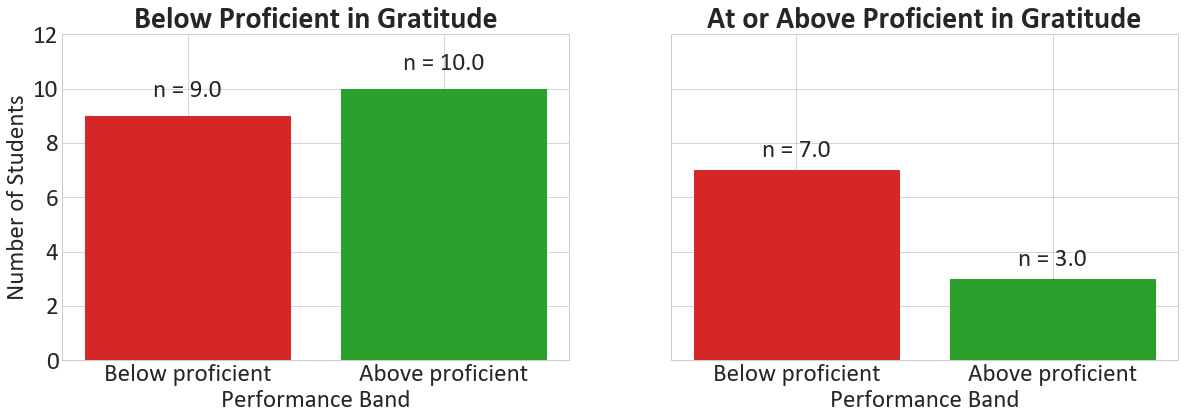

p-value: 0.41587088331483757


In [128]:
plt.rcParams.update({'font.size': 25})

performance_bands = ['Below proficient', 'Above proficient']
x0 = np.arange(len(performance_bands))
width = 0.8

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize = (20,6))

barlist0 = ax0.bar(x0, tm1_count_df['mastery'], width)
ax0.set(title='Below Proficient in Gratitude', xlabel = 'Performance Band', ylabel = 'Number of Students')
ax0.set_xticks(x0)
ax0.set_xticklabels(performance_bands, wrap = True)
ax0.set_ylim([0,12])

labels = ['n = {}'.format(n) for n in tm1_count_df['mastery']]

for bar, label in zip(barlist0, labels):
    height = bar.get_height()
    ax0.text(bar.get_x() + bar.get_width() / 2, height + 0.5, label, ha = 'center', va = 'bottom')

barlist0[0].set_color(colors[3])
barlist0[1].set_color(colors[2])
    
barlist1 = ax1.bar(x0, tm2_count_df['mastery'], width)
ax1.set(title='At or Above Proficient in Gratitude', xlabel = 'Performance Band')
ax1.set_xticks(x0)
ax1.set_xticklabels(performance_bands, wrap = True)

labels = ['n = {}'.format(n) for n in tm2_count_df['mastery']]

for bar, label in zip(barlist1, labels):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.3, label, ha = 'center', va = 'bottom')

barlist1[0].set_color(colors[3])
barlist1[1].set_color(colors[2])
    
plt.show()

t_val, p_val = stats.ttest_ind(tm1_df['mastery'],tm2_df['mastery'], equal_var = False)

print('p-value: {}'.format(p_val))

## Data Analysis for One Student

## Next Steps from Analyses of Academic and Character Data